In [1]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sn
import pandas as pd
import numpy as np
from numpy import array

In [2]:
dfDatos = pd.read_excel("cancer_patient_data_sets.xlsx")
dfDatos

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [3]:
dfDatos.keys()

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [4]:
DatosColumna_Level = dfDatos['Level'].unique()
print(DatosColumna_Level)

['Low' 'Medium' 'High']


In [5]:
d1 = {'Low': 0, 'Medium': 1, 'High': 2}
dfDatos['Level'] = dfDatos['Level'].map(d1)
dfDatos

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,2
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,2
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [6]:
dfDatos.keys()

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [7]:
features = ['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk'
            ,'Genetic Risk', 'chronic Lung Disease','Balanced Diet','Obesity', 'Smoking', 'Passive Smoker'
            ,'Chest Pain', 'Coughing of Blood', 'Fatigue','Weight Loss', 'Shortness of Breath', 'Wheezing' 
            ,'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough']
X = dfDatos[features]
X

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough
0,33,2,4,5,4,3,3,2,2,4,...,2,4,3,4,2,2,3,1,2,3
1,17,3,1,5,3,4,4,2,2,2,...,2,3,1,3,7,8,6,2,1,7
2,35,4,5,6,5,5,5,4,6,7,...,4,8,8,7,9,2,1,4,6,7
3,37,7,7,7,7,6,6,7,7,7,...,7,8,4,2,3,1,4,5,6,7
4,46,6,8,7,7,7,7,6,7,7,...,7,9,3,2,4,1,4,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,6,7,7,7,7,7,6,7,7,...,7,7,5,3,2,7,8,2,4,5
996,37,6,8,7,7,7,7,6,7,7,...,7,7,9,6,5,7,2,4,3,1
997,25,4,5,6,5,5,5,4,6,7,...,4,8,8,7,9,2,1,4,6,7
998,18,6,8,7,7,7,7,6,7,7,...,7,9,3,2,4,1,4,2,4,2


In [8]:
y = dfDatos['Level']
y

0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64

In [9]:
print(X, y, sep='\n\n')

     Age  Air Pollution  Alcohol use  Dust Allergy  OccuPational Hazards  \
0     33              2            4             5                     4   
1     17              3            1             5                     3   
2     35              4            5             6                     5   
3     37              7            7             7                     7   
4     46              6            8             7                     7   
..   ...            ...          ...           ...                   ...   
995   44              6            7             7                     7   
996   37              6            8             7                     7   
997   25              4            5             6                     5   
998   18              6            8             7                     7   
999   47              6            5             6                     5   

     Genetic Risk  Genetic Risk  chronic Lung Disease  Balanced Diet  Obesity  \
0     

In [15]:
dtree = DecisionTreeClassifier(max_leaf_nodes=9, random_state=0)
dtree = dtree.fit(X, y)

In [16]:
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('ArbolDecision.png')

True

<IPython.core.display.Javascript object>


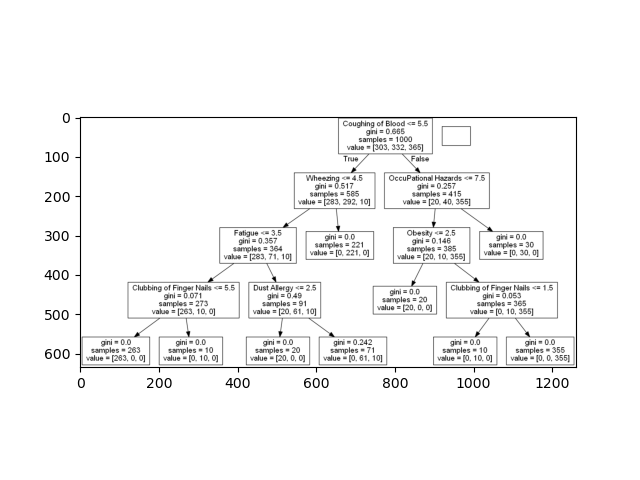

In [17]:
img = pltimg.imread('ArbolDecision.png')
imgplot = plt.imshow(img)
plt.show()

In [18]:
data = {'y_Actual':    y,
        'y_Predicted': y }

<IPython.core.display.Javascript object>


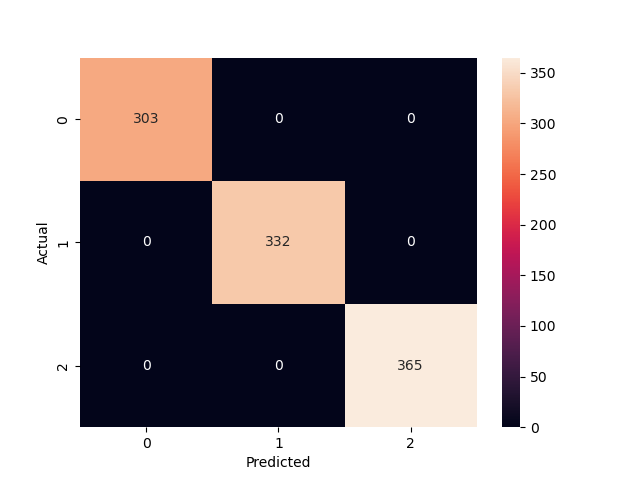

In [19]:
dfDatos = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(dfDatos['y_Actual'], dfDatos['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt ='d')
plt.show()